In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.optimizers import Adam
#because of multiclass datasets
from keras.utils.np_utils import to_categorical 
import random

In [0]:
np.random.seed(0)

In [0]:
#import 6000 images from mnist data set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [0]:
#look for the condition throw error otherwise
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal .."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal .."
assert(X_train.shape[1:] == (28, 28)), "The dimension of the images are not 28x28"
assert(X_test.shape[1:] == (28, 28)), "The dimension of the images are not 28x28"

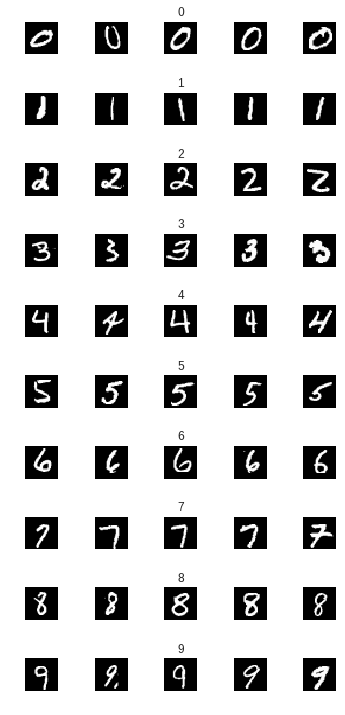

In [50]:
num_of_samples = []

cols = 5
num_of_classes = 10

fig, axs = plt.subplots(nrows=num_of_classes, ncols=cols,
                       figsize=(5, 10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_of_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected -1)),
                                :, :],
                    cmap=plt.get_cmap('gray'))
    axs[j][i].axis("off")
    if i==2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

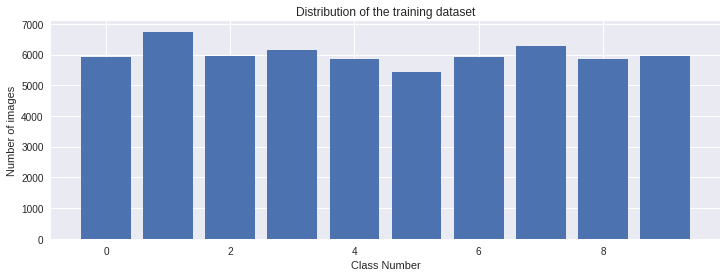

In [51]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_of_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of images")

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10) 

In [0]:
#Each image has Intensity from 0 to 255
X_train = X_train/255 
X_test = X_test/255

In [54]:
#we must change the shape of the images to 1d array(28*28)
#for multipication 1*784
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0],
                         num_pixels)
X_test = X_test.reshape(X_test.shape[0],
                         num_pixels)
print(X_train.shape)

(60000, 784)


In [0]:
def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim = num_pixels,
                  activation = 'relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(num_of_classes, activation='softmax'))
  model.compile(Adam(lr=0.01),
                loss='categorical_crossentropy',
               metrics=['accuracy'])
  return model           

In [56]:
model = create_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [57]:
history = model.fit(X_train, y_train, validation_split=0.1,
         epochs=10, batch_size=200, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.5433 - acc: 0.8291 - val_loss: 0.2713 - val_acc: 0.9242
Epoch 2/10
54000/54000 [==============================] - 1s 15us/step - loss: 0.3021 - acc: 0.9112 - val_loss: 0.2402 - val_acc: 0.9328
Epoch 3/10
54000/54000 [==============================] - 1s 15us/step - loss: 0.2738 - acc: 0.9200 - val_loss: 0.2297 - val_acc: 0.9340
Epoch 4/10
54000/54000 [==============================] - 1s 15us/step - loss: 0.2578 - acc: 0.9241 - val_loss: 0.2097 - val_acc: 0.9400
Epoch 5/10
54000/54000 [==============================] - 1s 15us/step - loss: 0.2442 - acc: 0.9289 - val_loss: 0.2134 - val_acc: 0.9388
Epoch 6/10
54000/54000 [==============================] - 1s 15us/step - loss: 0.2428 - acc: 0.9291 - val_loss: 0.2140 - val_acc: 0.9418
Epoch 7/10
54000/54000 [==============================] - 1s 15us/step - loss: 0.2333 - acc: 0.9324 - val_loss: 0.2027 - val_acc:

Text(0.5, 0, 'epoch')

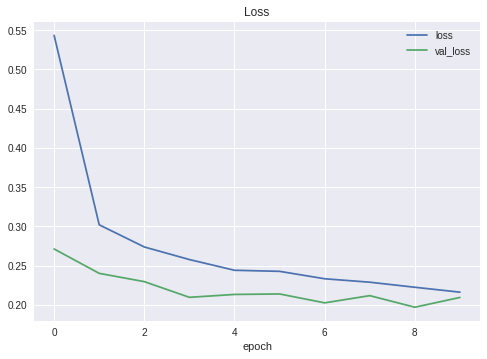

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

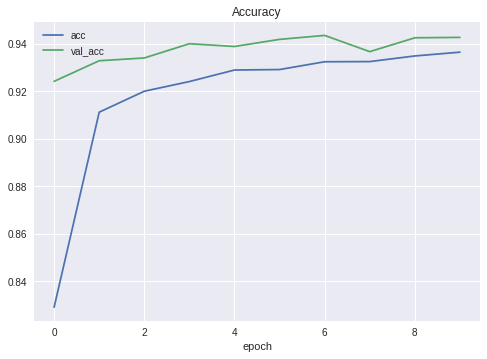

In [59]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [62]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

<class 'list'>
Test Score: 0.25105205658078195
Test Accuracy: 0.9277
